In [80]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import hinge_loss,log_loss
from matplotlib.colors import ListedColormap
from matplotlib import cm
from matplotlib.animation import FuncAnimation

In [85]:
# # -*- coding: utf-8 -*-

# %matplotlib notebook
# %load 汇报
#加载所需的模块
from sklearn import datasets
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

np.random.seed(123)

#生成样本
# X,y= datasets.make_circles(n_samples = 2000, factor=0.3, noise=.2)
X,y = datasets.make_moons(n_samples=2000, noise=.1)
# X,y = datasets.make_gaussian_quantiles(n_classes=2,n_samples=2000)

#划分训练集和测试集
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#最大最小标准化到0~255
ss = StandardScaler().fit(X)
X = ss.transform(X)/2
X_test = ss.transform(X_test)/2

#构建特征空间
c,r = np.mgrid[[slice(-1,1,0.02)]*2]
p = np.c_[c.flat,r.flat]

#可视化
fig = plt.figure(figsize = (9,3))
#自定义cmap
top = cm.get_cmap('Oranges_r', 512)
bottom = cm.get_cmap('Blues', 512)
newcolors = np.vstack((top(np.linspace(0.55, 1, 512)),
                       bottom(np.linspace(0, 0.75, 512))))
cm_bright = ListedColormap(newcolors, name='OrangeBlue')

plt.subplot(121)
m1 = plt.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('train samples')
plt.axis('equal')
plt.subplot(122)
m2 = plt.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('test samples')
plt.axis('equal')
ax = fig.get_axes()
plt.colorbar(ax = ax)
plt.show()

In [86]:
""" hinge loss """
%matplotlib auto
def hinge_l(y_true,y_pred):
    return np.maximum(1-y_true*y_pred,0.)

clf = SGDClassifier(loss='hinge',max_iter=1,verbose=1,shuffle=True,random_state=1012,
                   penalty='none')
clf.fit(X,y)
hinge_loss_log = []
for i in range(1000):
    hinge_loss_log.append(hinge_l(y,(clf.coef_@X.T+clf.intercept_).squeeze()))
    clf.partial_fit(X,y)
vmin=np.min(hinge_loss_log)
vmax = np.max(hinge_loss_log)
fig,ax = plt.subplots(figsize=[8,5])
loss_map = ax.scatter(*X.T,hinge_loss_log[0],vmin=vmin,vmax=vmax,cmap=cm_bright)
cbar = fig.colorbar(loss_map)
time_text = fig.text(0.05, 0.9, '', fontsize = 12,transform=ax.transAxes) 
def update(ite):
    ax.clear()
    loss_map=ax.scatter(*X.T,hinge_loss_log[ite+1],vmin=vmin,vmax=vmax,cmap=cm_bright)
    cbar.on_mappable_changed(loss_map)
    time_text.set_text('%d epoch'%(epoch+1))
ani = FuncAnimation(fig,update,frames=999,interval=10)
# plt.show()

Using matplotlib backend: Qt5Agg
-- Epoch 1
Norm: 17.69, NNZs: 2, Bias: -0.158581, T: 1340, Avg. loss: 0.979443
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 11.64, NNZs: 2, Bias: -0.125573, T: 1340, Avg. loss: 0.639522
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 8.67, NNZs: 2, Bias: -0.120967, T: 1340, Avg. loss: 0.511238
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 7.46, NNZs: 2, Bias: -0.128735, T: 1340, Avg. loss: 0.447751
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 7.02, NNZs: 2, Bias: -0.125425, T: 1340, Avg. loss: 0.426510
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 6.93, NNZs: 2, Bias: -0.109194, T: 1340, Avg. loss: 0.397843
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5.89, NNZs: 2, Bias: -0.104176, T: 1340, Avg. loss: 0.375702
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 6.13, NNZs: 2, Bias: -0.102544, T: 1340, Avg. loss: 0.361476
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 5.08, NNZs: 2, Bias: -0.094434, T: 1340, Avg

Norm: 3.74, NNZs: 2, Bias: -0.068423, T: 1340, Avg. loss: 0.275789
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.74, NNZs: 2, Bias: -0.068485, T: 1340, Avg. loss: 0.275763
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.74, NNZs: 2, Bias: -0.068546, T: 1340, Avg. loss: 0.275737
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.74, NNZs: 2, Bias: -0.068607, T: 1340, Avg. loss: 0.275711
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.74, NNZs: 2, Bias: -0.068668, T: 1340, Avg. loss: 0.275685
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.74, NNZs: 2, Bias: -0.068727, T: 1340, Avg. loss: 0.275754
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.74, NNZs: 2, Bias: -0.068844, T: 1340, Avg. loss: 0.275944
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.74, NNZs: 2, Bias: -0.068961, T: 1340, Avg. loss: 0.275918
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.74, NNZs: 2, Bias: -0.069077, T: 1340, Avg. loss: 0.275893
Total training time: 0.00 sec

-- Epoch 1
Norm: 3.71, NNZs: 2, Bias: -0.044443, T: 1340, Avg. loss: 0.273811
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.71, NNZs: 2, Bias: -0.062268, T: 1340, Avg. loss: 0.273921
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.70, NNZs: 2, Bias: -0.044708, T: 1340, Avg. loss: 0.273905
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.70, NNZs: 2, Bias: -0.062448, T: 1340, Avg. loss: 0.273906
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.69, NNZs: 2, Bias: -0.062541, T: 1340, Avg. loss: 0.273818
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.69, NNZs: 2, Bias: -0.045097, T: 1340, Avg. loss: 0.273812
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.69, NNZs: 2, Bias: -0.062712, T: 1340, Avg. loss: 0.273885
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.69, NNZs: 2, Bias: -0.045349, T: 1340, Avg. loss: 0.273798
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.69, NNZs: 2, Bias: -0.062881, T: 1340, Avg. loss: 0.273871
Total training tim

Norm: 3.67, NNZs: 2, Bias: -0.048857, T: 1340, Avg. loss: 0.273030
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.68, NNZs: 2, Bias: -0.048920, T: 1340, Avg. loss: 0.272949
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.67, NNZs: 2, Bias: -0.048989, T: 1340, Avg. loss: 0.273008
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.68, NNZs: 2, Bias: -0.049053, T: 1340, Avg. loss: 0.272962
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.68, NNZs: 2, Bias: -0.049116, T: 1340, Avg. loss: 0.272939
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.68, NNZs: 2, Bias: -0.049184, T: 1340, Avg. loss: 0.272999
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.68, NNZs: 2, Bias: -0.049246, T: 1340, Avg. loss: 0.272931
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.67, NNZs: 2, Bias: -0.049313, T: 1340, Avg. loss: 0.272994
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.67, NNZs: 2, Bias: -0.049388, T: 1340, Avg. loss: 0.273004
Total training time: 0.00 sec

-- Epoch 1
Norm: 3.66, NNZs: 2, Bias: -0.059887, T: 1340, Avg. loss: 0.272507
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.67, NNZs: 2, Bias: -0.059922, T: 1340, Avg. loss: 0.272441
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.67, NNZs: 2, Bias: -0.059958, T: 1340, Avg. loss: 0.272480
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.67, NNZs: 2, Bias: -0.059996, T: 1340, Avg. loss: 0.272484
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.66, NNZs: 2, Bias: -0.060038, T: 1340, Avg. loss: 0.272497
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.66, NNZs: 2, Bias: -0.060072, T: 1340, Avg. loss: 0.272438
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.66, NNZs: 2, Bias: -0.060114, T: 1340, Avg. loss: 0.272495
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.66, NNZs: 2, Bias: -0.060148, T: 1340, Avg. loss: 0.272433
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 3.67, NNZs: 2, Bias: -0.060184, T: 1340, Avg. loss: 0.272469
Total training tim

TypeError: You must first set_array for mappable

In [78]:
def hinge_l(y_true,y_pred):
    return np.mean(np.maximum(1-y_true*y_pred,0.),axis=-1)
def log_l(y_true,y_pred):
    y_pred=np.clip(y_pred,1e-3,0.999)
    return np.mean(-y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred),axis=-1)
log_l(y,(clf.coef_@X.T+clf.intercept_).squeeze())
log_loss(y,clf.decision_function(X))

-0.009131726038955042

1000
1000
1000
1000
1000


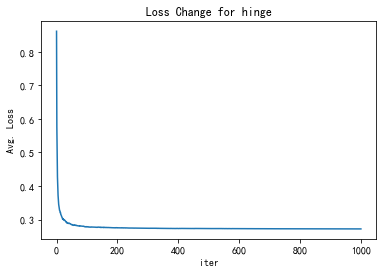

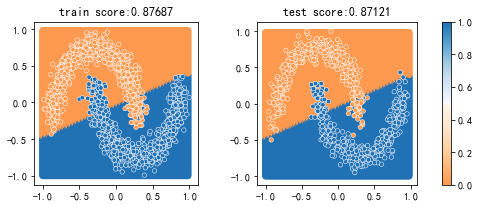

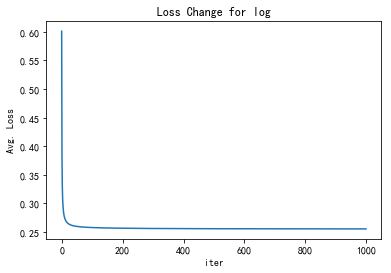

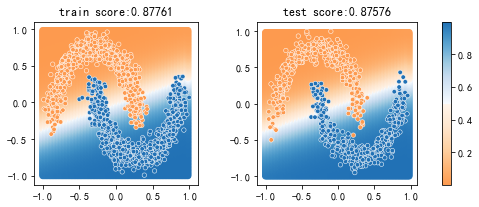

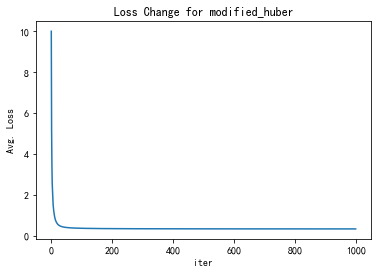

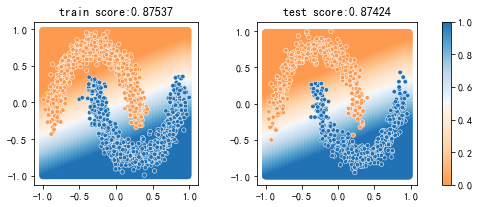

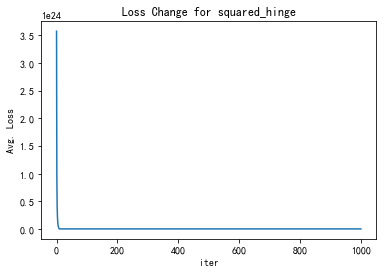

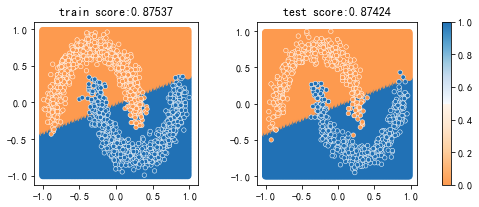

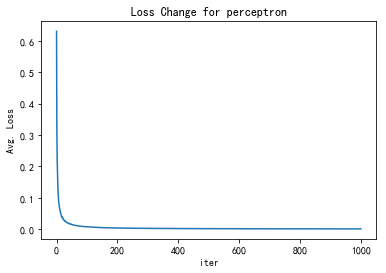

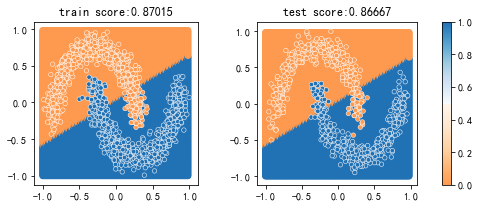

In [3]:
import sys
from io import StringIO

loss_type = ['hinge','log','modified_huber','squared_hinge','perceptron']
loss_func_loss = []
for loss in loss_type:
    old_stdout = sys.stdout
    sys.stdout = mystdout = StringIO()
    clf = SGDClassifier(loss=loss,max_iter=1000,verbose=1,shuffle=False,random_state=1012)
    clf.fit(X,y)
    y_prd = clf.predict(X_test)
    if loss in ['log','modified_huber']:
        prob = clf.predict_proba(p)[:,1]
    else:
        prob = clf.predict(p)
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(9, 3),subplot_kw = {'aspect':'equal'})
    ax1.scatter(*p.T,c = prob,cmap = cm_bright)
    ax1.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
    ax1.set_title('train score:%.5f'% clf.score(X,y))
    mp = ax2.scatter(*p.T,c = prob,cmap = cm_bright)
    ax2.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
    ax2.set_title('test score:%.5f'%clf.score(X_test,y_test))
    plt.colorbar(mp,ax = [ax1,ax2])

(0, 10)

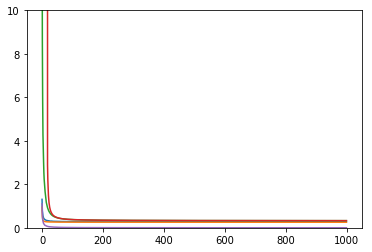

In [33]:
for i,l in enumerate(loss_func_loss):
    plt.plot(range(len(l)),l,label=loss_type[i])
_=plt.ylim(0,10)